In [1]:
from config_jupyter import set_wd
set_wd()
import modules.scrap_indec as scrap

In [4]:
scrap.scrap_database(anio_desde="2019", anio_hasta="2019",frecuencia="anual")

['2019']

In [5]:
df = scrap.extraer_y_concatenar_dfs_anuales(opciones=["2019"],anio_hasta="19")

In [6]:
import pandas as pd
enmienda = pd.read_csv("data/CE_ENMIENDA.csv", encoding="latin-1", sep=";",dtype={"ncm":str,"cnro_enmienda":str})
enmienda_dict = dict(zip(enmienda.ncm, enmienda.ncm_descri))
pais_origen = pd.read_csv("data/CE_PAIS.csv", sep=";",dtype=dict(CCOD_PAIS=str,CCOD_ASOC=str))
pais_origen.CCOD_ASOC = pais_origen.CCOD_ASOC.fillna(pais_origen.CCOD_PAIS)
dict_paises = dict(zip(pais_origen.CCOD_PAIS, pais_origen.CDESCRI))
pais_origen['pais_descri'] = pais_origen.CCOD_ASOC.apply(lambda x: dict_paises[x])
dict_paises = dict(zip(pais_origen.CCOD_PAIS, pais_origen.pais_descri))
dict_continentes = {'1':"África","2":"América","3":"Asia","4":"Europa","5":"Oceanía","9":"Indeterminado"}

In [7]:
df.insert(2, "ncm_descri", df.ncm.apply(lambda x: enmienda_dict[x]))
df.insert(4,"pais_descri", df.porg.apply(lambda x: dict_paises[x]))
df.insert(5,"continente", df.porg.apply(lambda x: dict_continentes[x[0]]))

In [8]:
df

,año,ncm,ncm_descri,porg,pais_descri,continente,pnet(kg),fob(u$s),flete(u$s),seguro(u$s),cif(u$s)
0,2019,01012100,"Caballos,reproductores de raza pura",200,Argentina,América,9800.00,354774.00,45675.01,3636.86,404085.87
1,2019,01012100,"Caballos,reproductores de raza pura",203,Brasil,América,11350.00,174203.39,19332.02,1683.94,195219.35
2,2019,01012100,"Caballos,reproductores de raza pura",208,Chile,América,11000.00,136291.00,6294.63,2725.82,145311.45
3,2019,01012100,"Caballos,reproductores de raza pura",212,Estados Unidos,América,8300.00,449989.50,46382.80,3226.60,499598.90
4,2019,01012100,"Caballos,reproductores de raza pura",218,Mexico,América,500.00,35000.00,1724.64,367.25,37091.89
...,...,...,...,...,...,...,...,...,...,...,...
70974,2019,99980500,Muestras,451,Republica Checa,Europa,95.44,356.18,525.99,7.58,889.75
70975,2019,99980500,Muestras,454,Serbia,Europa,11.10,10.00,180.63,2.29,192.92
70976,2019,99980500,Muestras,498,Indeterminado (Europa),Europa,106.00,196.74,30.00,2.85,229.59
70977,2019,99980500,Muestras,501,Australia,Oceanía,147.03,649.97,917.96,21.32,1589.25


In [9]:
def calculos(df:pd.DataFrame):
    df["fle_fob"] = df["flete(u$s)"] / df["fob(u$s)"]
    df["fle_unitario"] = df["flete(u$s)"] / df["pnet(kg)"] * 1_000_000
    return df

In [10]:
calculos(df).sort_values("fle_fob",ascending=False).head(20) # hay valores muy bajos que generan outliers

,año,ncm,ncm_descri,porg,pais_descri,continente,pnet(kg),fob(u$s),flete(u$s),seguro(u$s),cif(u$s),fle_fob,fle_unitario
56533,2019,85234920,Discos grabados p/sistemas de lectura por rayo...,414,Hungria,Europa,0.20,0.02,435.24,1.14,436.40,21762.000000,2.176200e+09
9167,2019,29331990,Compuestos heterociclicos c/heteroatomos de ni...,203,Brasil,América,0.10,0.14,270.00,2.70,272.84,1928.571429,2.700000e+09
70962,2019,99980500,Muestras,435,Chipre,Europa,0.15,0.04,45.00,0.23,45.27,1125.000000,3.000000e+08
11613,2019,30049068,"Medicamentos c/Ciclosporina A,Fluspirileno,Tio...",435,Chipre,Europa,5.13,0.83,211.25,0.35,212.43,254.518072,4.117934e+07
16399,2019,38249989,Productos y preparaciones a base de compuestos...,435,Chipre,Europa,0.87,0.15,35.22,0.06,35.43,234.800000,4.048276e+07
9512,2019,29335999,Compuestos heterociclicos c/heteroatomos de ni...,413,Grecia,Europa,0.02,1.13,229.74,0.11,230.98,203.309735,1.148700e+10
3405,2019,27011200,Hulla bituminosa s/aglomerar,218,Mexico,América,60.00,14.00,2397.10,0.73,2411.83,171.221429,3.995167e+07
2919,2019,23069010,Tortas y residuos solidos de grasas o aceites ...,203,Brasil,América,15.00,1.38,216.22,0.76,218.36,156.681159,1.441467e+07
11633,2019,30049069,Medicamentos c/compuestos heterociclicos c/het...,413,Grecia,Europa,0.54,0.81,126.18,0.06,127.05,155.777778,2.336667e+08
9972,2019,29349999,Compuestos heterociclicos ncop.,413,Grecia,Europa,0.15,0.23,35.04,0.02,35.29,152.347826,2.336000e+08


In [11]:
sum(df["flete(u$s)"]) / sum(df["fob(u$s)"])

0.042430100005501

In [12]:
calculos(df).columns

Index(['año', 'ncm', 'ncm_descri', 'porg', 'pais_descri', 'continente',
       'pnet(kg)', 'fob(u$s)', 'flete(u$s)', 'seguro(u$s)', 'cif(u$s)',
       'fle_fob', 'fle_unitario'],
      dtype='object')

In [13]:
import plotly.graph_objects as go

def plot_observaciones():
    df_plot = df.copy()
    df_plot = calculos(df_plot)
    fig = go.Figure(data=go.Scatter(
    x=df_plot["fob(u$s)"]/1_000_000,
    y=df_plot['flete(u$s)']/1_000_000,
    mode='markers',
    
    customdata=df[["ncm", "ncm_descri", "pais_descri", "fle_fob", "fle_unitario"]],
    hovertemplate=
    "<b>FOB:</b> %{x}<br>" +
    "<b>Flete:</b> %{y}<br>"+
    "<b>NCM:</b> %{customdata[0]}<br>" +
    "<b>Descripción NCM:</b> %{customdata[1]}<br>" +
    "<b>País:</b> %{customdata[2]}<br>" +
    "<b>Flete / FOB:</b> %{customdata[3]}<br>" +
    "<b>Flete Unitario:</b> %{customdata[4]}<br>" +
    "<extra></extra>"
    
    # customdata=[
    #     df_plot["ncm"], df_plot["ncm_descri"], df_plot["pais_descri"], df_plot["fle_fob"], df_plot["fle_unitario"]
    # ],
    # hovertemplate=
    # '<b>ncm:</b> %{customdata[0]}<br>' +
    # '<b>ncm_descri:</b> %{customdata[1]}<br>' +
    # '<b>pais_descri:</b> %{customdata[2]}<br>' +
    # '<b>fle_fob:</b> %{customdata[3]}<br>' +
    # '<b>fle_unitario:</b> %{customdata[4]}<br>',
))

    fig.update_yaxes(tickformat = ",")
    fig.update_xaxes(tickformat = ",")
    fig.update_layout(
        template = None,
        xaxis_title='fob(u$s)',
        yaxis_title='flete(u$s)',
        title='Gráfico Scatter',
        separators = ",."
    )
    return fig

# plot_observaciones()

In [14]:
def plot_observaciones():
    df_plot = df.copy()
    df_plot = calculos(df_plot)
    df_plot = df_plot[(df_plot["fob(u$s)"] >= 1_000_000)&(df_plot.continente != "Indeterminado")&
                      (df.pais_descri != "Argentina")]
    fig = go.Figure(data=go.Scatter(
    x=df_plot["fob(u$s)"]/1_000_000,
    y=df_plot['fle_fob'],
    mode='markers',
    
    customdata=df_plot[["ncm", "ncm_descri", "pais_descri", "fob(u$s)", "fle_unitario"]],
    hovertemplate=
    "<b>Flete / FOB:</b> %{y}<br>" +
    "<b>Flete:</b> %{x}<br>"+
    "<b>NCM:</b> %{customdata[0]}<br>" +
    "<b>Descripción NCM:</b> %{customdata[1]}<br>" +
    "<b>País:</b> %{customdata[2]}<br>" +
    "<b>FOB:</b> %{customdata[3]}<br>" +
    "<b>Flete Unitario:</b> %{customdata[4]}<br>" +
    "<extra></extra>"
    
    # customdata=[
    #     df_plot["ncm"], df_plot["ncm_descri"], df_plot["pais_descri"], df_plot["fle_fob"], df_plot["fle_unitario"]
    # ],
    # hovertemplate=
    # '<b>ncm:</b> %{customdata[0]}<br>' +
    # '<b>ncm_descri:</b> %{customdata[1]}<br>' +
    # '<b>pais_descri:</b> %{customdata[2]}<br>' +
    # '<b>fle_fob:</b> %{customdata[3]}<br>' +
    # '<b>fle_unitario:</b> %{customdata[4]}<br>',
))

    fig.update_yaxes(tickformat = ",")
    fig.update_xaxes(tickformat = ",")
    fig.update_layout(
        template = None,
        xaxis_title='fob(u$s)',
        yaxis_title='flete / fob',
        title='Gráfico Scatter',
        separators = ",."
    )
    return fig

plot_observaciones()

In [15]:
df[df["fob(u$s)"] >= 1_000_000].sort_values("fle_fob",ascending=False).describe()

,pnet(kg),fob(u$s),flete(u$s),seguro(u$s),cif(u$s),fle_fob,fle_unitario
count,5.653000e+03,5.653000e+03,5.653000e+03,5.653000e+03,5.653000e+03,5653.000000,5.648000e+03
mean,5.385201e+06,7.267330e+06,3.061063e+05,2.996034e+04,7.603396e+06,0.041487,3.898070e+06
std,8.170856e+07,3.399796e+07,1.786110e+06,9.107811e+04,3.519859e+07,0.057631,1.133154e+08
min,0.000000e+00,1.000224e+06,0.000000e+00,0.000000e+00,1.016277e+06,0.000000,0.000000e+00
25%,6.782235e+04,1.454954e+06,3.489640e+04,5.947800e+03,1.523650e+06,0.016042,1.087441e+05
50%,2.726251e+05,2.398498e+06,7.519288e+04,1.180205e+04,2.510341e+06,0.028100,2.613995e+05
75%,1.028047e+06,5.086557e+06,1.746042e+05,2.547828e+04,5.324707e+06,0.048060,7.682287e+05
max,3.851813e+09,1.266024e+09,7.279539e+07,2.906241e+06,1.266024e+09,1.835043,8.066050e+09


In [16]:
df[df["fob(u$s)"] >= 1_000_000].sort_values("fle_fob",ascending=False)

,año,ncm,ncm_descri,porg,pais_descri,continente,pnet(kg),fob(u$s),flete(u$s),seguro(u$s),cif(u$s),fle_fob,fle_unitario
3032,2019,25010019,Sales a granel excluidas marinas,208,Chile,América,1.024218e+08,1.433905e+06,2631277.50,19323.87,4.084506e+06,1.835043,25690.603309
3842,2019,28070010,Acido sulfurico,410,Espa?a,Europa,7.128637e+07,2.781397e+06,3215417.79,50117.79,6.046933e+06,1.156044,45105.645017
3364,2019,26011100,"Minerales de hierro,s/aglomerar,excluidas piritas",203,Brasil,América,1.515003e+09,4.941972e+07,47509040.17,28337.53,9.695709e+07,0.961338,31359.038255
3393,2019,26180000,Escorias granuladas de la siderurgia,203,Brasil,América,6.764400e+07,1.306977e+06,1183290.60,5467.24,2.495735e+06,0.905365,17492.912897
3363,2019,26011100,"Minerales de hierro,s/aglomerar,excluidas piritas",202,Bolivia,América,6.726414e+07,2.440510e+06,1714526.00,7479.06,4.162515e+06,0.702528,25489.450991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,2019,27160000,Energia electrica,221,Paraguay,América,0.000000e+00,3.088949e+08,0.00,0.00,3.088949e+08,0.000000,NaN
3662,2019,27112100,Gas natural en estado gaseoso,202,Bolivia,América,3.851813e+09,1.266024e+09,0.00,0.00,1.266024e+09,0.000000,0.000000
70876,2019,99980100,Aprovisionamiento de combustibles y lubricante...,998,Indeterminado (Continente),Indeterminado,0.000000e+00,3.218872e+08,0.00,0.00,3.218872e+08,0.000000,NaN
70877,2019,99980200,Aprovisionamiento a buques y aeronaves excluid...,998,Indeterminado (Continente),Indeterminado,0.000000e+00,3.282026e+07,0.00,0.00,3.282026e+07,0.000000,NaN


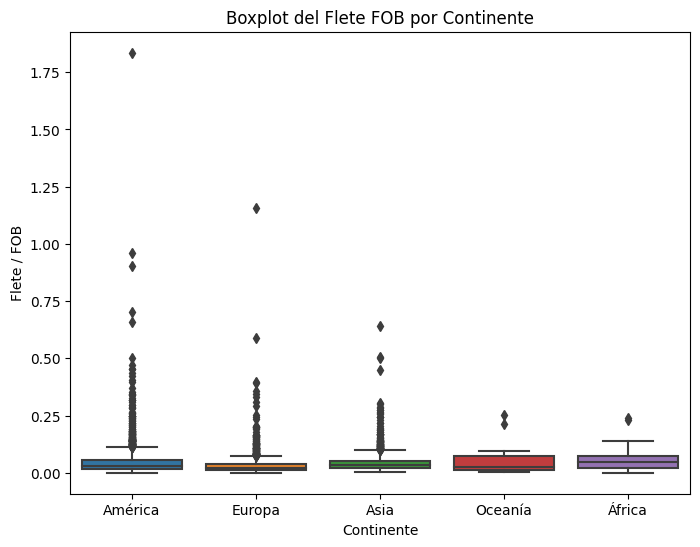

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def boxplot():
    df_plot = df.copy()
    df_plot = calculos(df_plot)
    df_plot = df_plot[(df_plot["fob(u$s)"] >= 1_000_000)&(df_plot.continente != "Indeterminado")&
                      (df.pais_descri != "Argentina")]
    
    # Crea el boxplot utilizando Seaborn
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_plot, x="continente", y="fle_fob")

    # Personaliza el gráfico
    plt.title("Boxplot del Flete FOB por Continente")
    plt.xlabel("Continente")
    plt.ylabel("Flete / FOB")
    
    return plt.show()

boxplot()


In [18]:
import pandas as pd
import plotly.express as px

def boxplot():
    df_plot = df.copy()
    df_plot = calculos(df_plot)
    df_plot = df_plot[(df_plot["fob(u$s)"] >= 1_000_000)&(df_plot.continente != "Indeterminado")&
                      (df.pais_descri != "Argentina")]
    
    # Crea el gráfico de boxplot utilizando Plotly Express
    fig = px.box(df_plot, x="continente", y="fle_fob",color="continente", hover_data=["ncm", "ncm_descri","pais_descri"])
    fig.update_yaxes(range=[0,0.3])
    # Personaliza el gráfico
    fig.update_layout(
        title="Boxplot del Flete FOB por Continente",
        xaxis_title="Continente",
        yaxis_title="Flete / FOB",
        template = None
    )
    
    # Muestra el gráfico
    fig.show()

boxplot()


In [26]:
def violinplot(fob_min:int = 1_000_000, rango:list[float] = None):
    df_plot = df.copy()
    df_plot = calculos(df_plot)
    df_plot = df_plot[(df_plot["fob(u$s)"] >= fob_min) & (df_plot.continente != "Indeterminado") & (df.pais_descri != "Argentina")]

    # Crea el gráfico de violin plot utilizando Plotly Express
    fig = px.violin(df_plot, x="continente", y="fle_fob", color="continente", box=True, points="all", hover_data=["ncm", "ncm_descri", "pais_descri"])
    if rango:
        fig.update_yaxes(range=rango)
    
    # Personaliza el gráfico
    fig.update_layout(
        title="Violin Plot del Flete FOB por Continente",
        xaxis_title="Continente",
        yaxis_title="Flete / FOB",
        template=None
    )
    
    # Muestra el gráfico
    fig.show()

violinplot(fob_min=1_000_000, rango=[0,.3])
